<a href="https://colab.research.google.com/github/Zahra1954/monogram2/blob/master/Sleep%20Disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [3]:
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [74]:
df=df.drop('Person ID',axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  systolic_bp              374 non-null    object 
 12  diastolic_bp             374 non-null    object 
dtypes: float64(1), int64(10), object(2)
memory usage: 38.1+ KB


In [76]:
set(df['Gender'])

{0, 1}

In [77]:
set(df['Occupation'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [11]:
set(df['BMI Category'])

{'Normal', 'Normal Weight', 'Obese', 'Overweight'}

In [12]:
set(df['Sleep Disorder'])

{'Insomnia', 'None', 'Sleep Apnea'}

In [21]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight','Normal')

In [22]:
set(df['BMI Category'])

{'Normal', 'Obese', 'Overweight'}

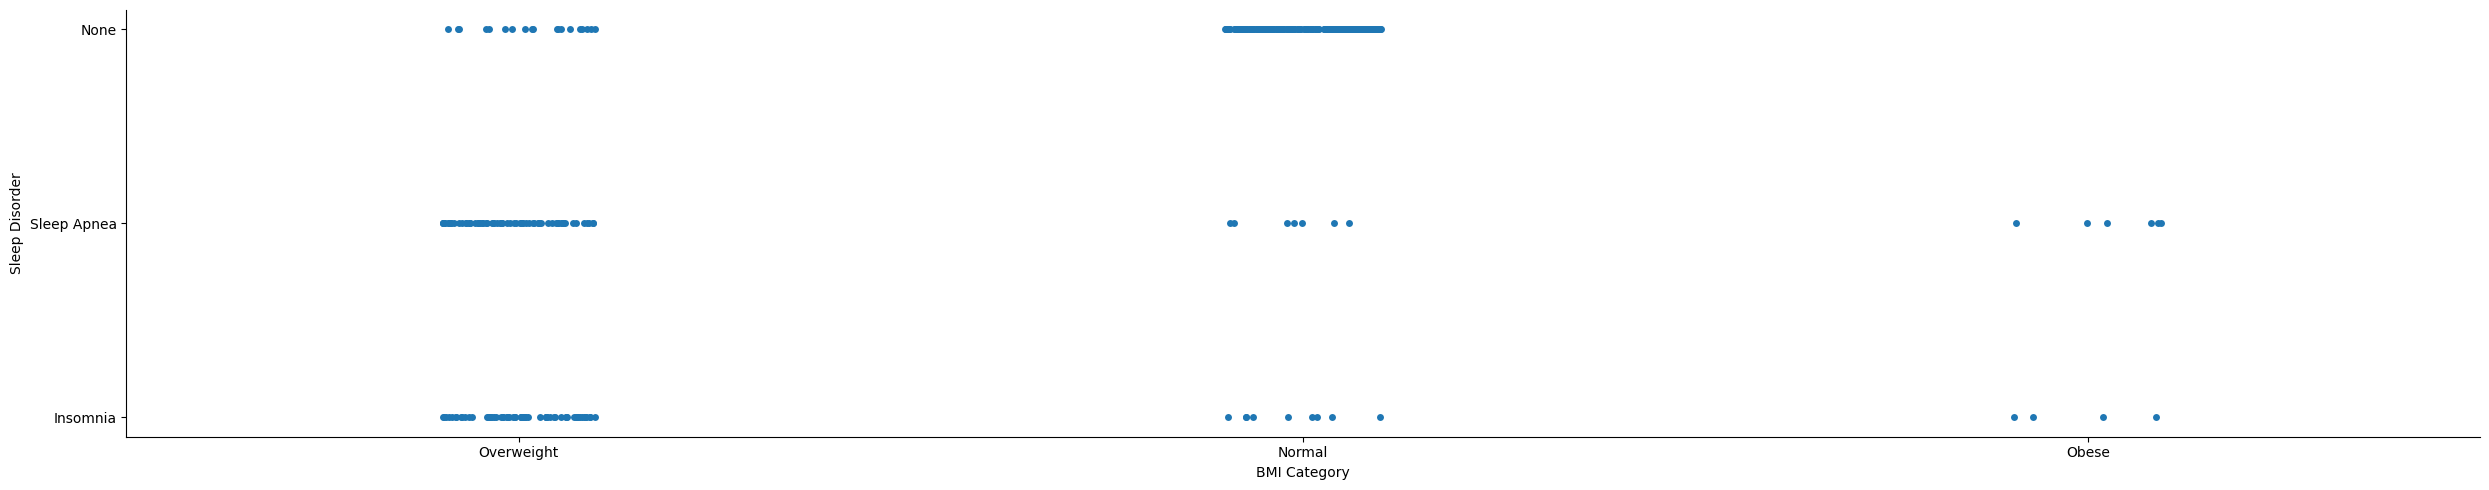

In [25]:
sns.catplot(y='Sleep Disorder',x='BMI Category',data=df, aspect=5)

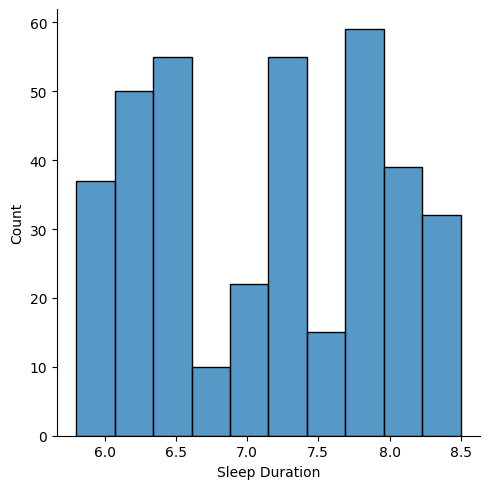

In [26]:
sns.displot(df['Sleep Duration'])

<Axes: xlabel='Occupation', ylabel='count'>

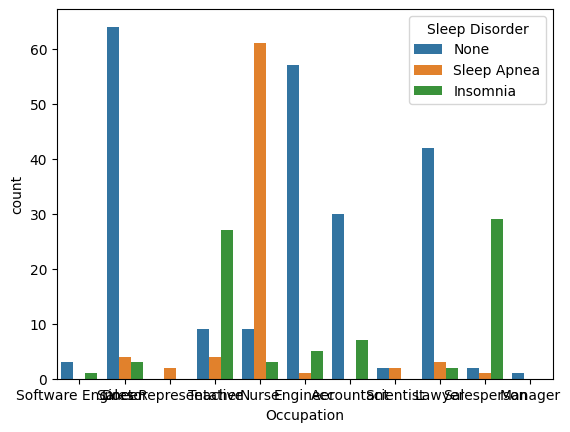

In [29]:
from matplotlib.pyplot import xlabel
sns.countplot(x='Occupation' ,data=df ,hue='Sleep Disorder')


In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [66]:
variations= ['Gender','BMI Category','Occupation','Sleep Disorder']
for i in variations:
  label_encoder.fit(df[i].unique())
  df[i]=label_encoder.transform(df[i])

  print(i,':',df[i].unique())

Gender : [1 0]
BMI Category : [2 0 1]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
Sleep Disorder : [1 2 0]


In [65]:
from sklearn.model_selection import train_test_split


In [68]:
x=df.drop('Sleep Disorder',axis=1)

In [67]:
y=df['Sleep Disorder']

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dectree= DecisionTreeClassifier()

In [96]:
dectree

DecisionTreeClassifier()

In [97]:
dectree.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
predict= dectree.predict(x_test)

In [99]:
predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0])

In [101]:
accuracy_score(y_test,predict,normalize=True)

0.84

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  systolic_bp              374 non-null    object 
 12  diastolic_bp             374 non-null    object 
dtypes: float64(1), int64(10), object(2)
memory usage: 38.1+ KB


In [82]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90


In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel= LogisticRegression()

In [86]:
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
prediction= logmodel.predict(x_test)

In [88]:
prediction

array([2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0,
       2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 0])

In [89]:
y_test

169    1
38     1
89     1
168    1
234    0
      ..
266    0
344    2
160    1
334    1
240    0
Name: Sleep Disorder, Length: 75, dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_test,prediction)

array([[ 5,  6,  3],
       [ 6, 26, 10],
       [ 0, 11,  8]])

In [92]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(y_test,prediction,normalize=True)

0.52

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.60      0.62      0.61        42
           2       0.38      0.42      0.40        19

    accuracy                           0.52        75
   macro avg       0.48      0.47      0.47        75
weighted avg       0.52      0.52      0.52        75



In [104]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.88      0.88      0.88        42
           2       0.75      0.79      0.77        19

    accuracy                           0.84        75
   macro avg       0.83      0.82      0.82        75
weighted avg       0.84      0.84      0.84        75



In [ ]:
so DecisionTreeClassifier is more suitable for this data